<a href="https://colab.research.google.com/github/manish021996/Web-Scraping-and-NLP-Sentiment-Analysis-/blob/main/Data_Extraction_and_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libary
import pandas as pd
import requests
import bs4 as bfs
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
df = pd.read_csv("/content/drive/MyDrive/NLP/Input.xlsx - Sheet1.csv")
df

,URL_ID,URL
0,37,https://insights.blackcoffer.com/ai-in-healthc...
1,38,https://insights.blackcoffer.com/what-if-the-c...
2,39,https://insights.blackcoffer.com/what-jobs-wil...
3,40,https://insights.blackcoffer.com/will-machine-...
4,41,https://insights.blackcoffer.com/will-ai-repla...
...,...,...
106,146,https://insights.blackcoffer.com/blockchain-fo...
107,147,https://insights.blackcoffer.com/the-future-of...
108,148,https://insights.blackcoffer.com/big-data-anal...
109,149,https://insights.blackcoffer.com/business-anal...


In [ ]:
# insert all url id in url_list
url_list = [url for url in df['URL']]
url_list[:5]

['https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/',
 'https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/',
 'https://insights.blackcoffer.com/what-jobs-will-robots-take-from-humans-in-the-future/',
 'https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/',
 'https://insights.blackcoffer.com/will-ai-replace-us-or-work-with-us/']

In [ ]:
# extract all data from url id
extracted_data = []
for i in url_list:
  extracted_data.append(requests.get(i, headers={"User-Agent": "XY"}))

In [ ]:
# checking content which extracted from first url_id
extracted_data[0].content

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans%3A300italic%2C400%2C400italic%2C600%2C600italic%2C700%7CRoboto%3A300%2C400%2C400italic%2C500%2C500italic%2C700%2C900" />\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n<meta property="og:image" content="https://insights.blackcoffer.com/wp-content/uploads/2021/06/h12-slider-image-2.jpg" />\n\t<!-- This site is optimized with the Yoast SEO plugin v19.14 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>AI in healthcare to Improv

In [ ]:
# get the html parser
for i in range(len(extracted_data)):
  extracted_data[i] = bfs.BeautifulSoup(extracted_data[i].content, 'html.parser')

In [ ]:
extracted_data[0]

<!DOCTYPE doctype html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head><link href="https://fonts.googleapis.com/css?family=Open+Sans%3A300italic%2C400%2C400italic%2C600%2C600italic%2C700%7CRoboto%3A300%2C400%2C400italic%2C500%2C500italic%2C700%2C900" rel="stylesheet"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<meta content="https://insights.blackcoffer.com/wp-content/uploads/2021/06/h12-slider-image-2.jpg" property="og:image"/>
<!-- This site is optimized with the Yoast SEO plugin v19.14 - https://yoast.com/wordpress/plugins/seo/ -->
<title>AI in healthcare to Improve Patient Outcomes - Blackcoffer Insights</title>

In [ ]:
# fetch all the data having class-td-post-content
extracted_text = []
for i in extracted_data:
  extracted_text.append(i.find(attrs= {"class":"td-post-content"}).text.replace('\n',''))

In [ ]:
# get the count of sentence for each url id
nltk.download('punkt')
no_of_sentences = []
for text in extracted_text:
  no_of_sentences.append(len(sent_tokenize(text)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# No of words for each url id
no_of_words = []
for text in extracted_text:
  no_of_words.append(len(word_tokenize(text)))

In [ ]:
# importing libery to read all files inside the folder
import os
import glob

file_path = "/content/drive/MyDrive/NLP/Stopwords"
read_files = glob.glob(os.path.join(file_path,"*.txt"))

In [ ]:
# insert the words of each file in stopwords_files
stopwords_files = []
for files in read_files:
  st_words = pd.read_fwf(files, header = 0, encoding = 'latin1')
  stopwords_files.append(st_words)

In [ ]:
stopwords_files[5]

,AFGHANI | Afghanistan,Unnamed: 1
0,ARIARY | Madagascar,NaN
1,BAHT | Thailand,NaN
2,BALBOA | Panama,NaN
3,BIRR | Ethiopia,NaN
4,BOLIVAR | Venezuela,NaN
...,...,...
79,TUGRIK | Mongolia,NaN
80,VATU | Vanuatu,NaN
81,"WON | Korea, South",NaN
82,YEN | Japan,NaN


In [ ]:
# deleting extra columns having all NaN
stopwords_files[5].pop('Unnamed: 1')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
Name: Unnamed: 1, Length: 84, dtype: object

In [ ]:
# after deleting column
stopwords_files[5]

,AFGHANI | Afghanistan
0,ARIARY | Madagascar
1,BAHT | Thailand
2,BALBOA | Panama
3,BIRR | Ethiopia
4,BOLIVAR | Venezuela
...,...
79,TUGRIK | Mongolia
80,VATU | Vanuatu
81,"WON | Korea, South"
82,YEN | Japan


In [ ]:
# merge all the file in stopwords_files and create pandas DataFrame
merge_value = np.vstack(stopwords_files)
stopwords_df = pd.DataFrame(merge_value)
stopwords_df.columns= ['stopwords']
stopwords_df

,stopwords
0,STATE
1,NORTH
2,SOUTH
3,EAST
4,NORTHEAST
...,...
14095,GUO
14096,LIN
14097,HE
14098,GAO


In [ ]:
# download all the stopwords from nltk library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# get all stopword of english
stopwords = list(stopwords.words('english'))

In [ ]:
# check stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# eliminating text from extracted_text which are present in stopwords_df and replacing punctuations with empty string
cleaned_text = [' ']*len(extracted_text)
for i in range(len(extracted_text)):
  for j in stopwords_df:
    cleaned_text[i]= extracted_text[i].replace(" "+j,'').replace('\"','').replace('?','').replace('.','').replace(',','').replace('!','').replace('/','').replace('\\','')


In [ ]:
# eliminating text from cleaned_text which are present in stopwords
complete_clean_text = [' ']*len(cleaned_text)
for i in range(len(cleaned_text)):
  for j in stopwords:
    complete_clean_text[i]= cleaned_text[i].lower().replace(" "+j, "")

In [ ]:
complete_clean_text

['introduction“if anything kills over 10 million people in the next few decades it will be a highly infectious virus rather than a war not missiles but microbes” bill gates’s remarks at a ted conference in 2014 right after the world had avoided the ebola outbreak when the new unprecedented invisible virus hit us it met an overwhelmed and unprepared healthcare system and oblivious population this public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities for the past few years artificial intelligence has proven to be of tangible potential in the healthcare sectors clinical practices translational medical and biomedical researchafter the first case was detected in china on december 31st 2019 it was an ai program developed by bluedot that alerted the world about the pandemic it was quick to realise ai’s ability to analyse large chunks of data could help in detecting patterns and ide

In [ ]:
# create a dataframe of complete_clean_text
clean_text = pd.DataFrame(complete_clean_text)
clean_text.columns = ['Text']
clean_text

,Text
0,introduction“if anything kills over 10 million...
1,human minds a fascination in itself carrying t...
2,introductionai is rapidly evolving in the empl...
3,“anything that could give rise to smarter-than...
4,“machine intelligence is the last invention th...
...,...
106,reconciling with the financial realities of an...
107,what is an investmentan investment is a resour...
108,quality and affordable healthcare is a vision ...
109,analytics is a statistical scientific process ...


In [ ]:
# getting the count of word after cleaning text
no_of_clean_words = []
for word in complete_clean_text:
  no_of_clean_words.append(len(word_tokenize(word)))

In [ ]:
# loading positive.txt file
positive_words = pd.read_fwf("/content/drive/MyDrive/NLP/positive-words.txt")

In [ ]:
# loading negative.txt file
negative_words = pd.read_fwf("/content/drive/MyDrive/NLP/negative-words.txt",encoding='latin1')

In [ ]:
# create dataframe
positive_words.columns = ["Positive_words"]
negative_words.columns = ['Negative_words']
negative_words

,Negative_words
0,2-faces
1,abnormal
2,abolish
3,abominable
4,abominably
...,...
4777,zaps
4778,zealot
4779,zealous
4780,zealously


In [ ]:
# getting positive score
positive_score = [0]*len(complete_clean_text)
for i in range(len(complete_clean_text)):
  for word in positive_words['Positive_words']:
    for letter in complete_clean_text[i].split(' '):
      if letter == word:
        positive_score[i]+=1


In [ ]:
# getting negative score
negative_score = [0]*len(complete_clean_text)
for i in range(len(complete_clean_text)):
  for word in negative_words['Negative_words']:
    for letter in complete_clean_text[i].split(' '):
      if letter == word:
        negative_score[i]+=1

In [ ]:
# adding into dataframe df
df['Positive Score'] = positive_score

In [ ]:
# adding into dataframe df
df['Negative Score'] = negative_score

In [ ]:
df

,URL_ID,URL,Positive Score,Negative Score
0,37,https://insights.blackcoffer.com/ai-in-healthc...,74,31
1,38,https://insights.blackcoffer.com/what-if-the-c...,67,36
2,39,https://insights.blackcoffer.com/what-jobs-wil...,73,36
3,40,https://insights.blackcoffer.com/will-machine-...,79,21
4,41,https://insights.blackcoffer.com/will-ai-repla...,65,25
...,...,...,...,...
106,146,https://insights.blackcoffer.com/blockchain-fo...,25,27
107,147,https://insights.blackcoffer.com/the-future-of...,44,13
108,148,https://insights.blackcoffer.com/big-data-anal...,32,45
109,149,https://insights.blackcoffer.com/business-anal...,34,4


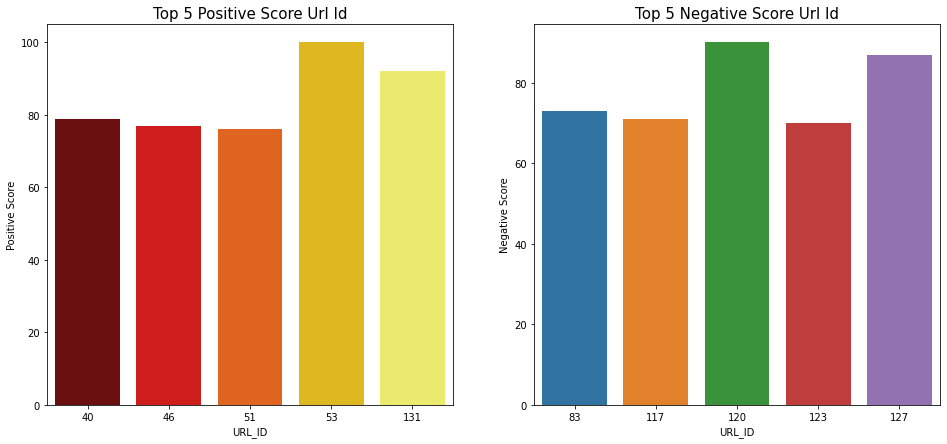

In [ ]:
# plot graphs for top url_id w.r.t positive and negative score
highest_positive_score = df.nlargest(n=5, columns = ["Positive Score"])
highest_negative_score = df.nlargest(n=5, columns = ["Negative Score"])

plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.barplot(data = highest_positive_score, x = 'URL_ID', y = "Positive Score",palette = 'hot').set_title("Top 5 Positive Score Url Id", fontsize =15)

plt.subplot(1,2,2)
sns.barplot(data = highest_negative_score, x = 'URL_ID', y = "Negative Score").set_title("Top 5 Negative Score Url Id", fontsize =15)
plt.show()

In [ ]:
# get polarity score
df['Polarity Score'] = (df['Positive Score']- df['Negative Score']) / ((df['Positive Score'] + df['Negative Score']) + 0.000001)

In [ ]:
# convert into np.array from maths operations
no_of_clean_words = np.array(no_of_clean_words)
no_of_sentences = np.array(no_of_sentences)
no_of_words = np.array(no_of_words)

In [ ]:
# get Subjectivity score
df['Subjectivity Score'] = (df['Positive Score'] + df['Negative Score']) / ((no_of_clean_words) + 0.000001)

In [ ]:
# get Avg Sentence Length
df['Avg Sentence Length'] = no_of_words / no_of_sentences

In [ ]:
# get the count of complex words and sylabble
complex_words = []
sylabble_counts = []

for extracted_text in extracted_text:
  sylabble_count = 0
  split_txt = extracted_text.split()
  complex_count = 0

  for word in split_txt:
    count = 0
    for i in range(len(word)):
      if(word[i] == 'a' or word[i] == 'e' or word[i] == 'i' or word[i] == 'o' or word[i] == 'u'):
           count+=1

      if(i == len(word) - 2 and (word[i] == 'e' and word[i+1] == 'd')):
        count-=1;
      if(i == len(word) - 2 and (word[i] == 'e' and word[i] == 's')):
        count-=1;
    sylabble_count+=count

    if(count >2):
        complex_count+=1
  sylabble_counts.append(sylabble_count)
  complex_words.append(complex_count)

In [ ]:
# get Percentage of complex words
df['Percentage of complex words'] = np.array(complex_words) / no_of_words

In [ ]:
# get Fog Index
df['Fog Index'] = 0.4* (df['Avg Sentence Length'] + df['Percentage of complex words'])

In [ ]:
# get Average Number of Words Per Sentence
df['Average Number of Words Per Sentence'] = no_of_clean_words / no_of_sentences

In [ ]:
# get Complex Word Count
df['Complex Word Count'] = complex_words

In [ ]:
# get Word Count
df['Word Count'] = no_of_clean_words

In [ ]:
# get Syllable Per Word
df['Syllable Per Word'] = np.array(sylabble_counts) / no_of_words

In [ ]:
# count of personal noune
count_personal_pronouns = []
personal_pronoun =['i', 'we','my', 'ours','and' 'us']
for cleaned_text in cleaned_text:
  count = 0
  for word in cleaned_text:
    if word in personal_pronoun:
      count+=1
  count_personal_pronouns.append(count)

In [ ]:
# get pers
df['Personal Pronouns'] = count_personal_pronouns

In [ ]:
# count total character in each word
total_characters = []
for text in clean_text['Text']:
  characters = 0
  for word in text.split():
    characters+=len(word)
  total_characters.append(characters)

In [ ]:
# get avg word length
df['Avg Word Length'] = np.array(total_characters) / no_of_clean_words

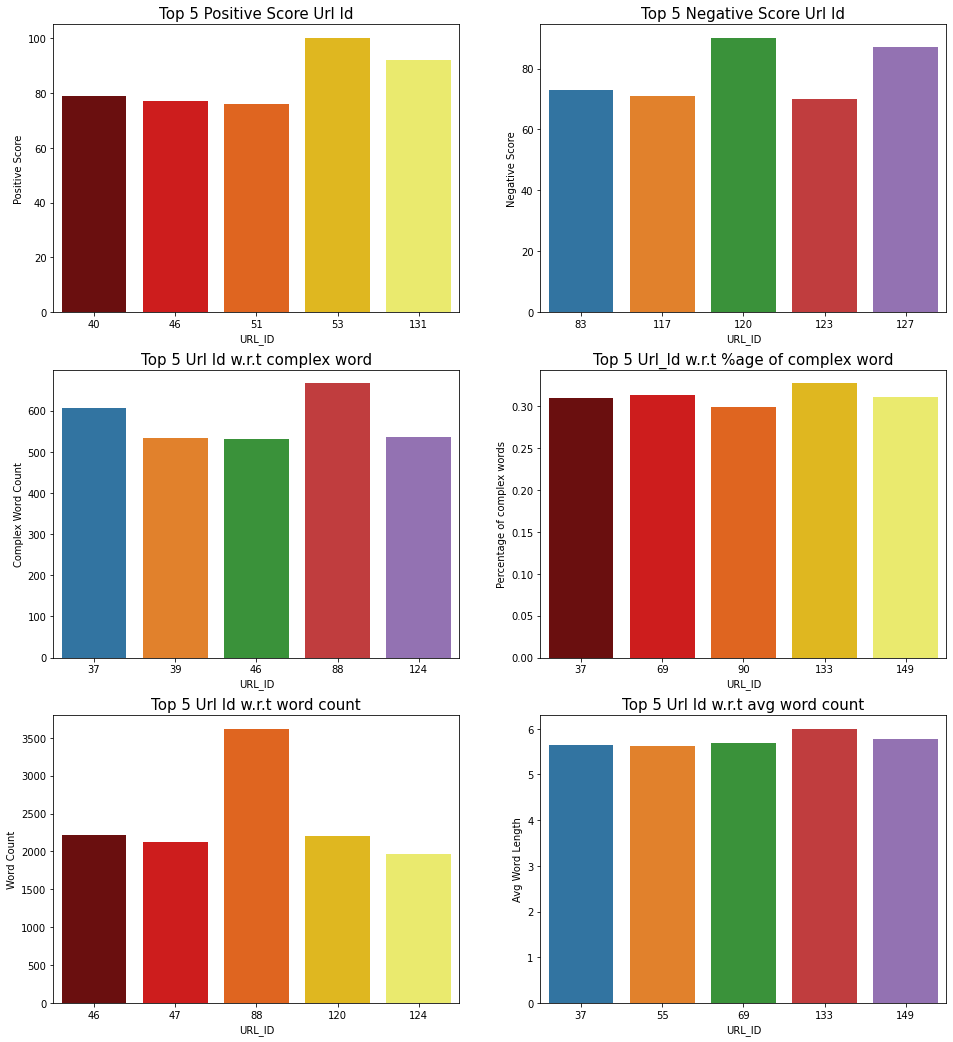

In [ ]:
# data visulisation
plt.figure(figsize = (16,18))

plt.subplot(3,2,1)
sns.barplot(data = highest_positive_score, x = 'URL_ID', y = "Positive Score",palette = 'hot').set_title("Top 5 Positive Score Url Id", fontsize =15)

plt.subplot(3,2,2)
sns.barplot(data = highest_negative_score, x = 'URL_ID', y = "Negative Score").set_title("Top 5 Negative Score Url Id", fontsize =15)

plt.subplot(3,2,3)
top_complex_word = df.nlargest(n=5, columns = ["Complex Word Count"])
sns.barplot(data = top_complex_word, x = 'URL_ID', y = "Complex Word Count").set_title("Top 5 Url Id w.r.t complex word", fontsize =15)

plt.subplot(3,2,4)
top_per_complex_word = df.nlargest(n=5, columns = ["Percentage of complex words"])
sns.barplot(data = top_per_complex_word, x = 'URL_ID', y = "Percentage of complex words",palette = 'hot').set_title("Top 5 Url_Id w.r.t %age of complex word", fontsize =15)

plt.subplot(3,2,5)
top_word_count = df.nlargest(n=5, columns = ["Word Count"])
sns.barplot(data = top_word_count, x = 'URL_ID', y = "Word Count",palette = 'hot').set_title("Top 5 Url Id w.r.t word count", fontsize =15)

plt.subplot(3,2,6)
top_avg_word_count = df.nlargest(n=5, columns = ["Avg Word Length"])
sns.barplot(data = top_avg_word_count, x = 'URL_ID', y = "Avg Word Length").set_title("Top 5 Url Id w.r.t avg word count", fontsize =15)
plt.show()

In [ ]:
# final output
df

,URL_ID,URL,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Avg Sentence Length,Percentage of complex words,Fog Index,Average Number of Words Per Sentence,Complex Word Count,Word Count,Syllable Per Word,Personal Pronouns,Avg Word Length
0,37,https://insights.blackcoffer.com/ai-in-healthc...,74,31,0.409524,0.058204,37.037736,0.309221,14.938783,34.037736,607,1804,1.906266,838,5.654102
1,38,https://insights.blackcoffer.com/what-if-the-c...,67,36,0.300971,0.071379,23.852941,0.198520,9.620585,21.220588,322,1443,1.561652,527,4.765073
2,39,https://insights.blackcoffer.com/what-jobs-wil...,73,36,0.339450,0.063705,27.970149,0.284952,11.302040,25.537313,534,1711,1.852721,783,5.397428
3,40,https://insights.blackcoffer.com/will-machine-...,79,21,0.580000,0.060976,22.948718,0.206704,9.262169,21.025641,370,1640,1.618436,550,4.846341
4,41,https://insights.blackcoffer.com/will-ai-repla...,65,25,0.444444,0.050111,28.750000,0.215345,11.586138,26.411765,421,1796,1.663939,659,4.980512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,146,https://insights.blackcoffer.com/blockchain-fo...,25,27,-0.038462,0.057269,26.432432,0.249489,10.672768,24.540541,244,908,1.776074,348,5.428414
107,147,https://insights.blackcoffer.com/the-future-of...,44,13,0.543860,0.035055,35.448980,0.238918,14.275159,33.183673,415,1626,1.667242,589,4.969865
108,148,https://insights.blackcoffer.com/big-data-anal...,32,45,-0.168831,0.065254,21.000000,0.266198,8.506479,19.344262,341,1180,1.731460,478,5.017797
109,149,https://insights.blackcoffer.com/business-anal...,34,4,0.789474,0.053521,41.944444,0.311258,16.902281,39.444444,235,710,1.985430,370,5.778873
